# EDA of the **relevant** HCP metadata


## Data Overview


In [14]:
import pandas as pd

# Load metadata
file1_path = 'HCP_1200_precise_age.csv'
file2_path = 'HCP_1200_all.csv'

metadata_precise_age = pd.read_csv(file1_path)
metadata_all = pd.read_csv(file2_path)

# Merge datasets
merged_metadata = pd.merge(
  metadata_precise_age, metadata_all,
  how='outer',
  left_on='subject', right_on='Subject'
)

selected_features = [
  'sex', 'age', 'race', 'Gender', 'Age', 
  '3T_Full_MR_Compl', 'T1_Count', 'T2_Count', '3T_RS-fMRI_Count', 
  '3T_RS-fMRI_PctCompl', '3T_Full_Task_fMRI', '7T_Full_MR_Compl', 
  '7T_RS-fMRI_Count', '7T_RS-fMRI_PctCompl', 'PicSeq_Unadj', 
  'PicSeq_AgeAdj', 'CardSort_Unadj', 'CardSort_AgeAdj', 'Flanker_Unadj', 
  'Flanker_AgeAdj', 'WM_Task_Acc', 'WM_Task_Median_RT', 'Language_Task_Acc', 
  'Emotion_Task_Acc', 'Gambling_Task_Perc_Larger', 'Relational_Task_Acc', 
  'FS_IntraCranial_Vol', 'FS_TotCort_GM_Vol', 'FS_SubCort_GM_Vol', 
  'FS_Total_GM_Vol', 'FS_LCort_GM_Vol', 'FS_RCort_GM_Vol', 
  'FS_L_Bankssts_Thck', 'FS_L_Caudalanteriorcingulate_Thck', 'Noise_Comp', 
  'MRsession_Scanner_3T'
]

# Extracting the subset
merged_metadata = merged_metadata[selected_features]

# Categorical features
categorical_features = [
  'sex', 'race', 'Gender', '3T_Full_MR_Compl', 'Age', '3T_Full_Task_fMRI',
  '7T_Full_MR_Compl', 'MRsession_Scanner_3T'
]
continuous_features = merged_metadata.select_dtypes(
  include=['float64']
).columns.tolist()

# Summarize merged dataset
print("Merged Metadata Summary:")
summary_merged = pd.DataFrame({
  'Column': merged_metadata.columns,
  'DataType': merged_metadata.dtypes,
  'MissingValues': merged_metadata.isnull().sum(),
  'UniqueValues': merged_metadata.nunique(),
})
pd.set_option('display.max_rows', None)
summary_merged = summary_merged.sort_values(by='MissingValues',
  ascending=False)
print(summary_merged)


Merged Metadata Summary:
                                                              Column DataType  \
Relational_Task_Acc                              Relational_Task_Acc  float64   
Emotion_Task_Acc                                    Emotion_Task_Acc  float64   
Language_Task_Acc                                  Language_Task_Acc  float64   
WM_Task_Median_RT                                  WM_Task_Median_RT  float64   
Gambling_Task_Perc_Larger                  Gambling_Task_Perc_Larger  float64   
WM_Task_Acc                                              WM_Task_Acc  float64   
age                                                              age  float64   
sex                                                              sex   object   
race                                                            race   object   
FS_RCort_GM_Vol                                      FS_RCort_GM_Vol  float64   
FS_TotCort_GM_Vol                                  FS_TotCort_GM_Vol  float64   
MRs

## Data Distribution


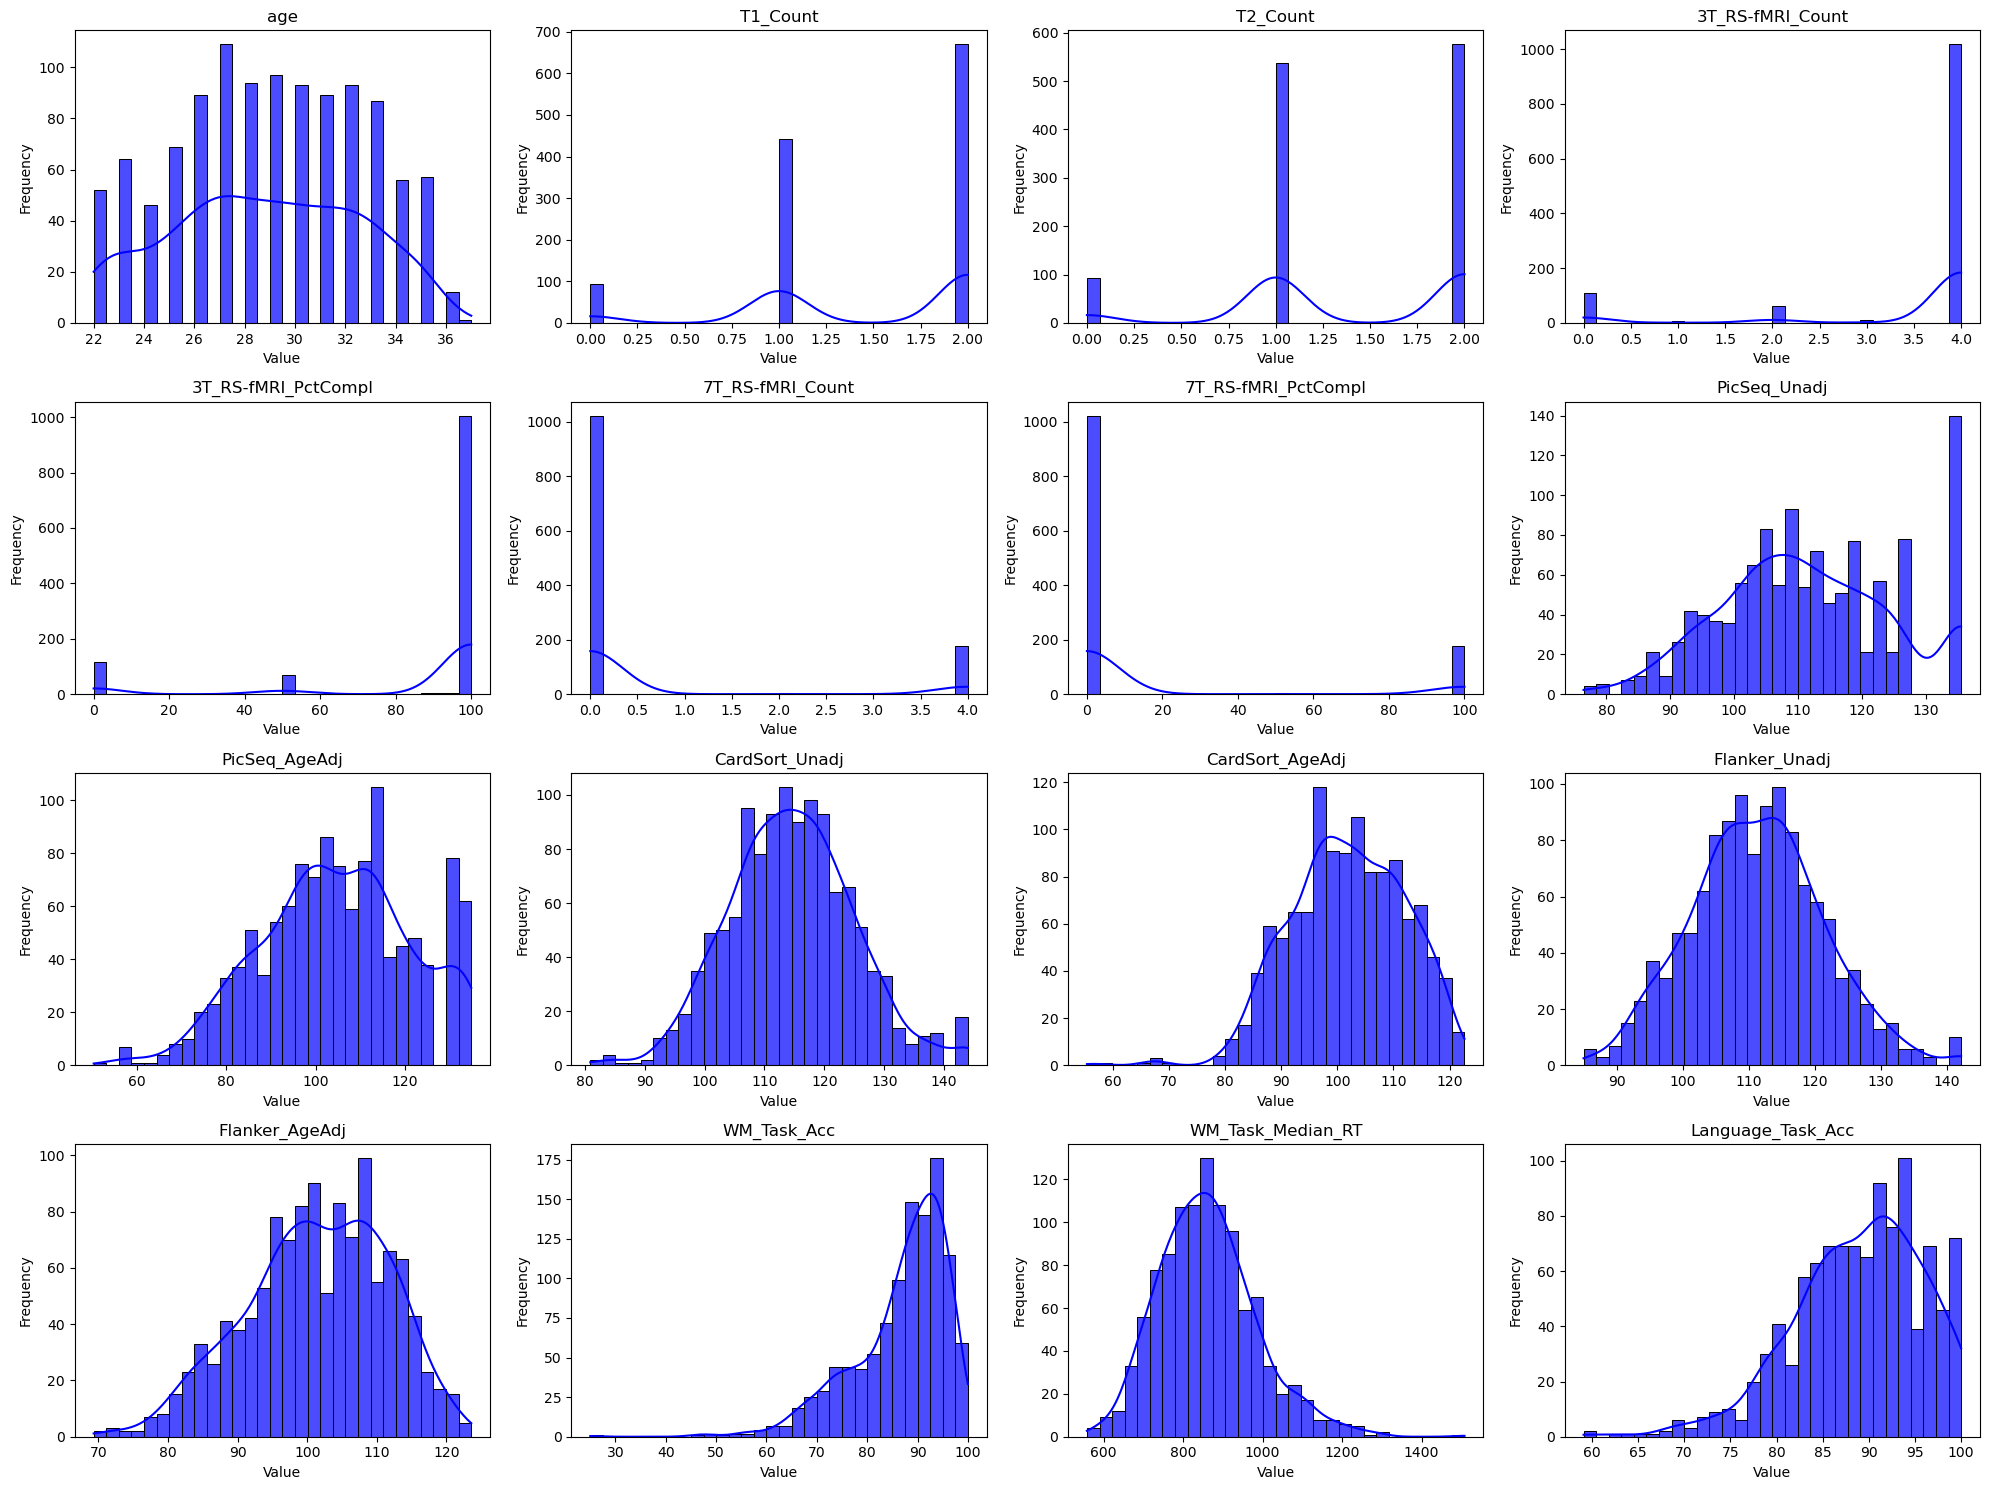

Summary Statistics for Continuous Features:
               age     T1_Count     T2_Count  3T_RS-fMRI_Count  \
count  1108.000000  1206.000000  1206.000000       1206.000000   
mean     28.800542     1.478441     1.400498          3.509950   
std       3.702452     0.635688     0.628216          1.215181   
min      22.000000     0.000000     0.000000          0.000000   
25%      26.000000     1.000000     1.000000          4.000000   
50%      29.000000     2.000000     1.000000          4.000000   
75%      32.000000     2.000000     2.000000          4.000000   
max      37.000000     2.000000     2.000000          4.000000   

       3T_RS-fMRI_PctCompl  7T_RS-fMRI_Count  7T_RS-fMRI_PctCompl  \
count          1206.000000       1206.000000          1206.000000   
mean             87.213267          0.599502            14.987313   
std              31.027886          1.421109            35.527138   
min               0.000000          0.000000             0.000000   
25%             

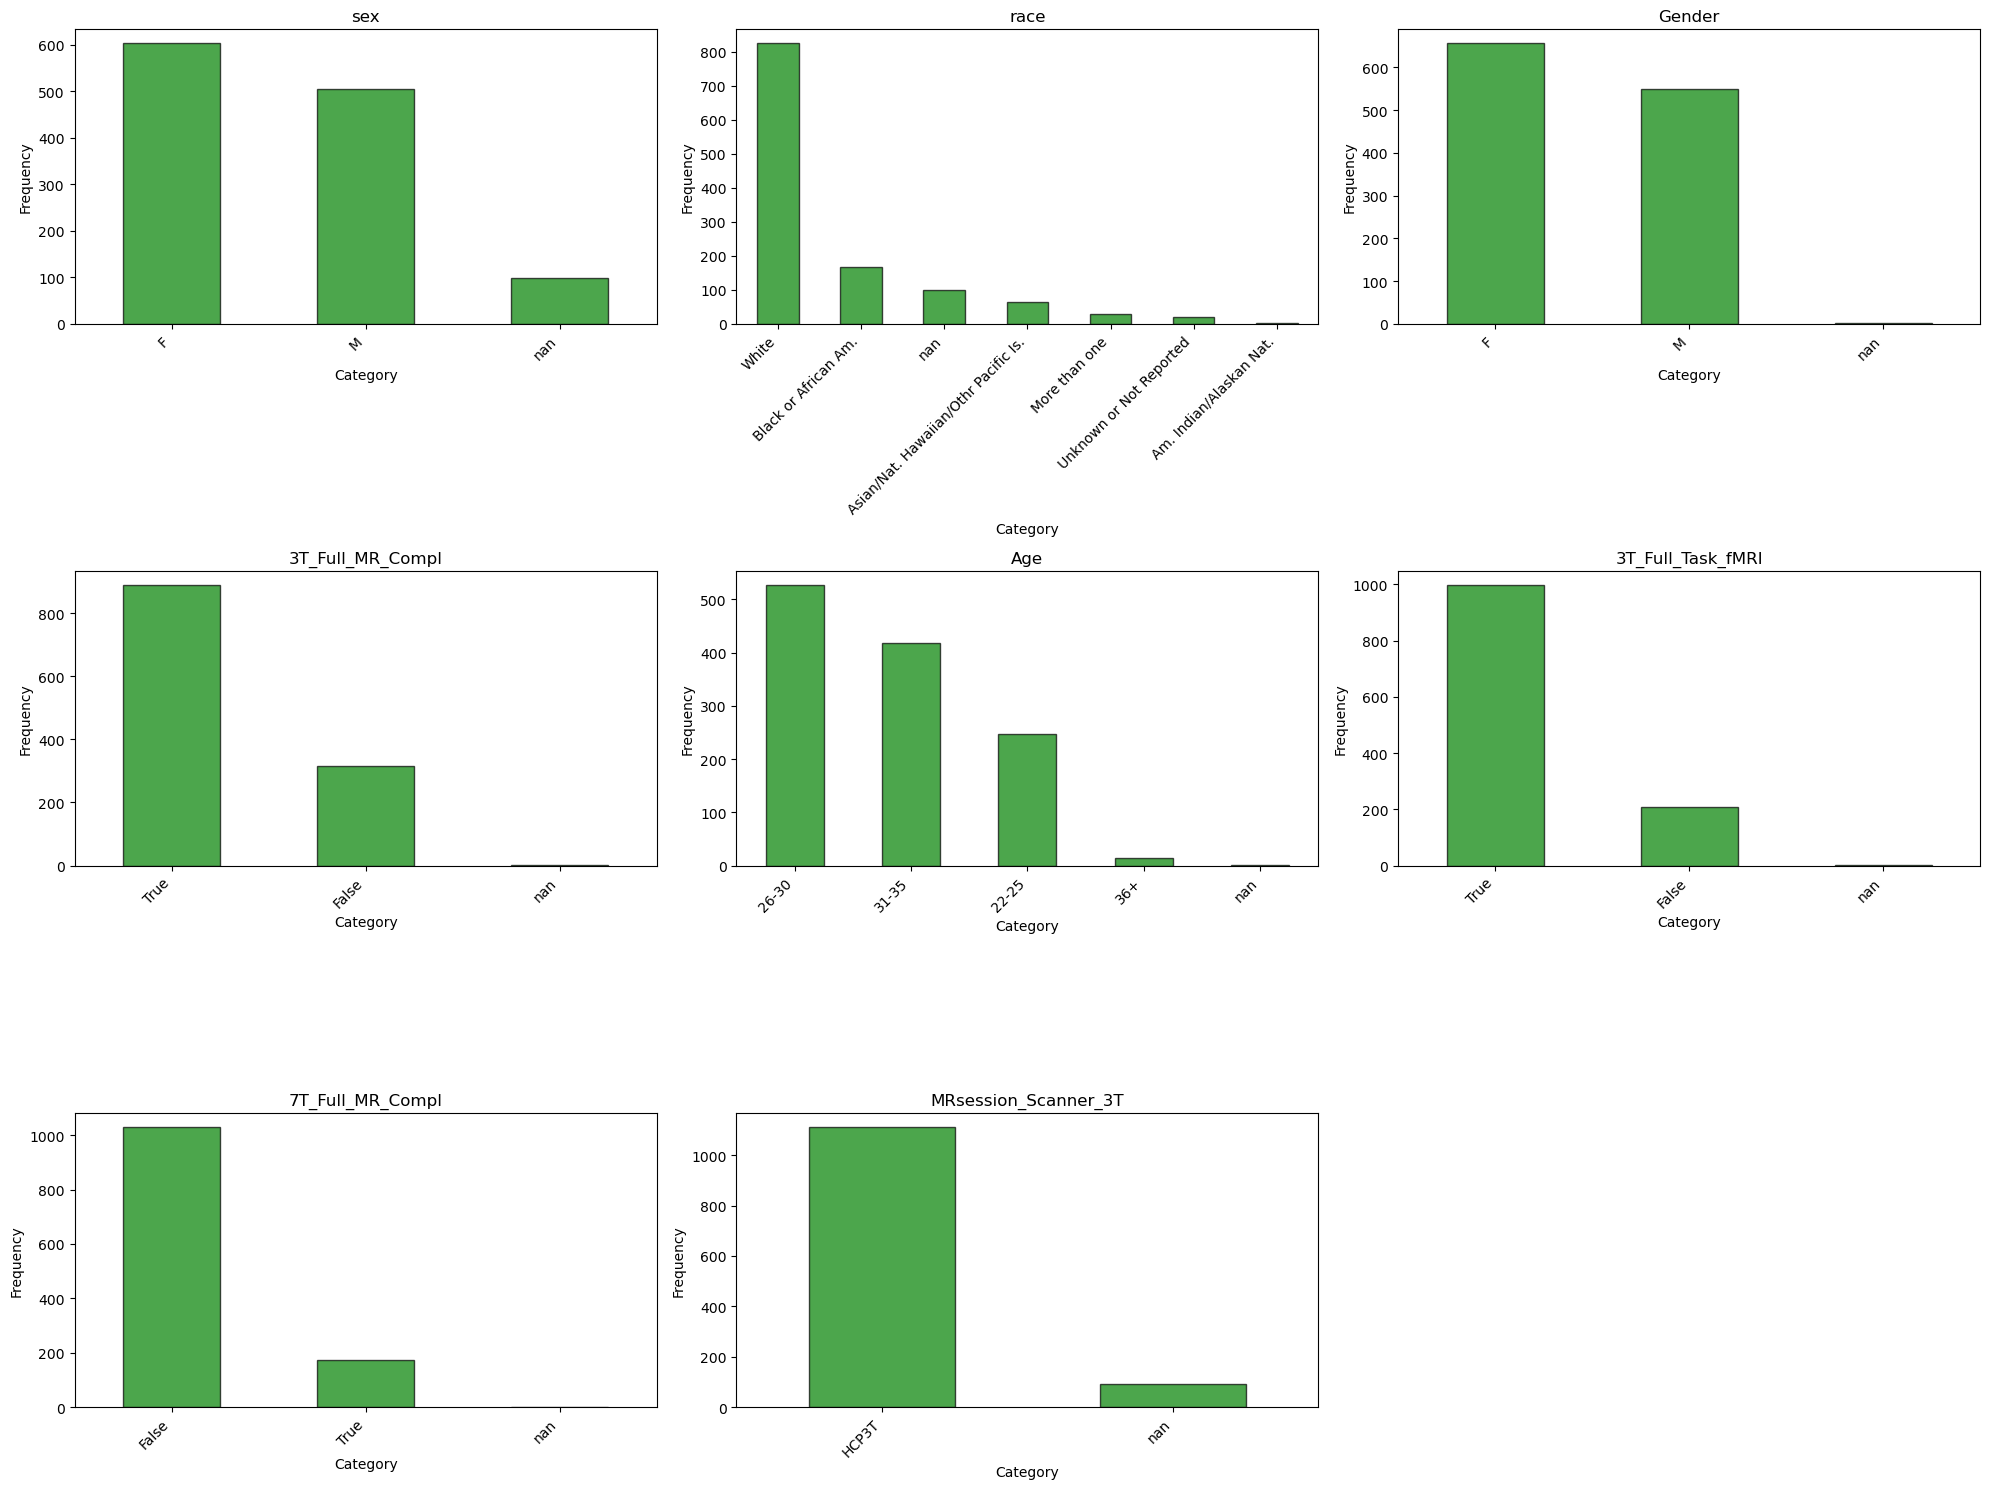

Summary Statistics for Categorical Features:
                     count unique    top  freq
sex                   1108      2      F   603
race                  1108      6  White   825
Gender                1206      2      F   656
3T_Full_MR_Compl      1206      2   True   889
Age                   1206      4  26-30   527
3T_Full_Task_fMRI     1206      2   True   998
7T_Full_MR_Compl      1206      2  False  1031
MRsession_Scanner_3T  1113      1  HCP3T  1113


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize continuous features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(continuous_features[:16], 1):
  plt.subplot(4, 4, i)
  sns.histplot(merged_metadata[feature].dropna(), kde=True, bins=30,
                 color='blue', alpha=0.7)
  plt.title(feature)
  plt.xlabel('Value')
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Summary statistics for continuous features
continuous_summary = merged_metadata[continuous_features].describe()
print("Summary Statistics for Continuous Features:")
print(continuous_summary)

# Check for skewness and kurtosis
skewness = (
  merged_metadata[continuous_features]
  .skew()
  .sort_values(ascending=False)
)
kurtosis = (
  merged_metadata[continuous_features]
  .kurtosis()
  .sort_values(ascending=False)
)
print("Skewness of Continuous Features:")
print(skewness)
print("\nKurtosis of Continuous Features:")
print(kurtosis)

# Visualize non-continuous (categorical) features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
  plt.subplot(3, 3, i)
  merged_metadata[feature].value_counts(dropna=False).plot(
        kind='bar', color='green', edgecolor='black', alpha=0.7
  )
  plt.title(feature)
  plt.xlabel('Category')
  plt.ylabel('Frequency')
  plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Summary statistics for categorical features
categorical_summary = (
  merged_metadata[categorical_features]
  .describe(include='all')
  .transpose()
)
print("Summary Statistics for Categorical Features:")
print(categorical_summary)


## Demographic Analysis


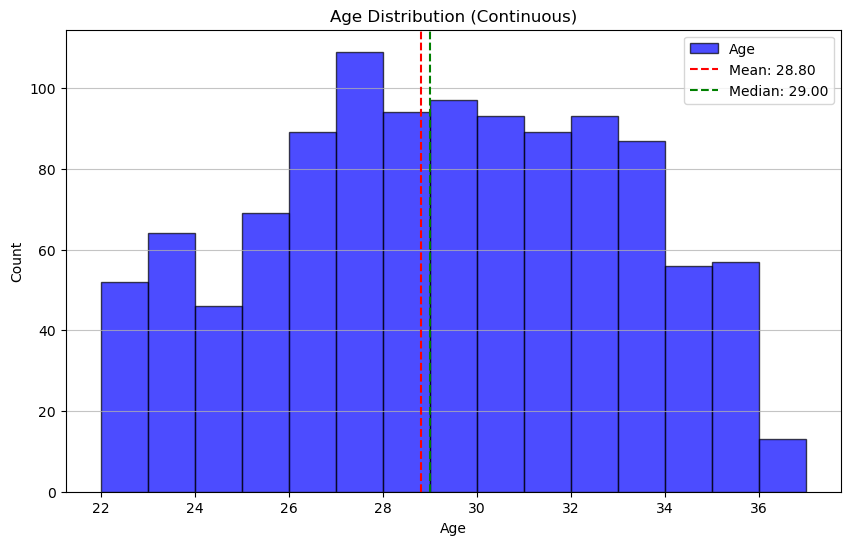

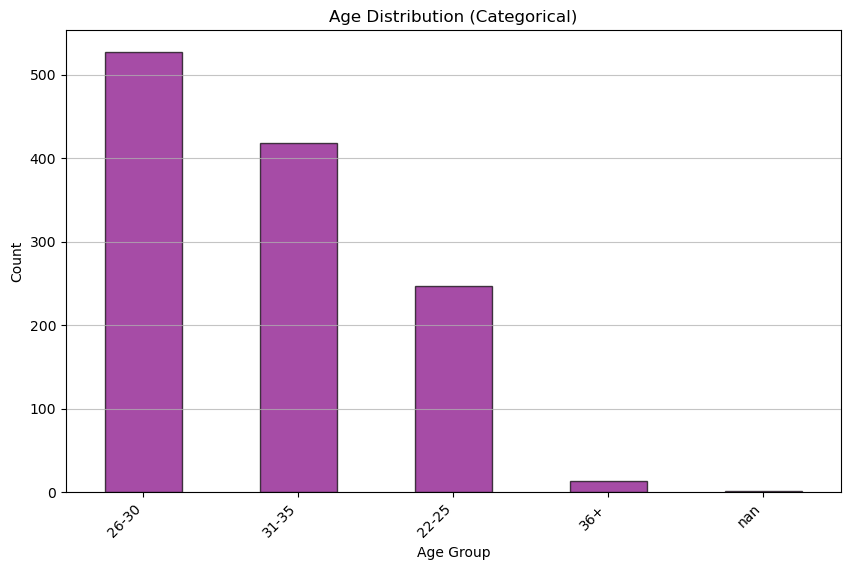

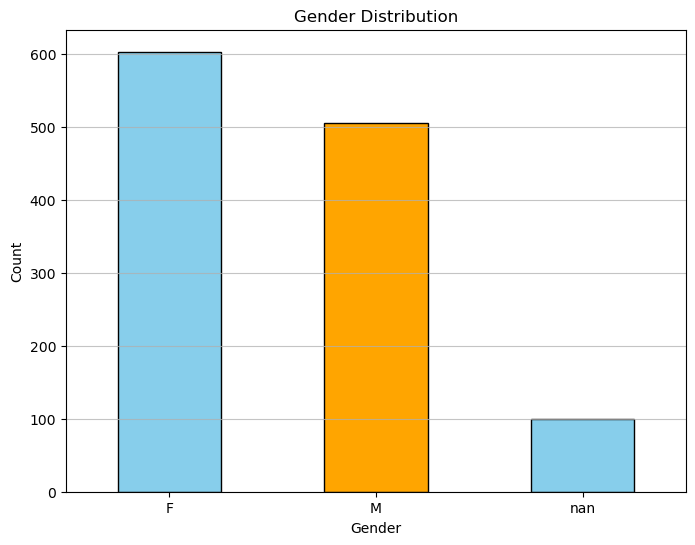

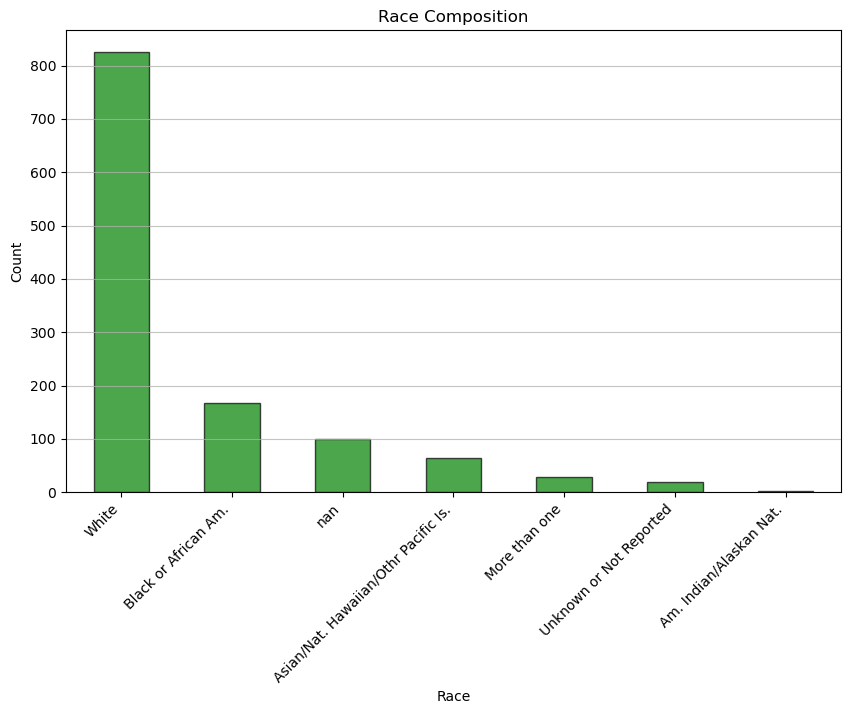

In [16]:
# Age Distribution (Continuous Feature)
plt.figure(figsize=(10, 6))
plt.hist(merged_metadata['age'].dropna(), bins=15, alpha=0.7, label='Age',
         color='blue', edgecolor='black')
mean_age = merged_metadata['age'].mean()
median_age = merged_metadata['age'].median()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=1.5,
            label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='green', linestyle='dashed', linewidth=1.5,
            label=f'Median: {median_age:.2f}')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution (Continuous)')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Age Distribution (Categorical Feature)
categorical_age_counts = merged_metadata['Age'].value_counts(dropna=False)
plt.figure(figsize=(10, 6))
categorical_age_counts.plot(kind='bar', color='purple', alpha=0.7,
                            edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution (Categorical)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Gender Distribution
gender_counts = merged_metadata['sex'].value_counts(dropna=False)
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

# Race Composition
if 'race' in merged_metadata.columns:
  race_counts = merged_metadata['race'].value_counts(dropna=False)
  plt.figure(figsize=(10, 6))
  race_counts.plot(kind='bar', color='green', alpha=0.7, edgecolor='black')
  plt.xlabel('Race')
  plt.ylabel('Count')
  plt.title('Race Composition')
  plt.xticks(rotation=45, ha='right')
  plt.grid(axis='y', alpha=0.75)
  plt.show()
else:
  print("Column 'race' not found in the dataset.")


## Image Data Completeness


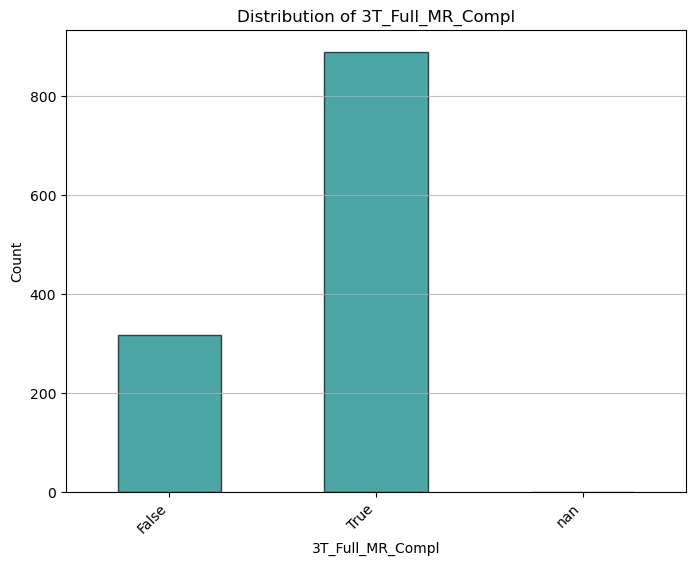

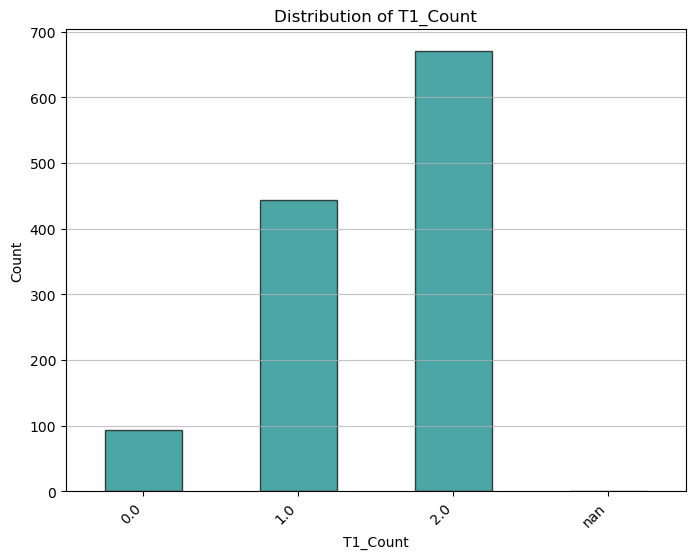

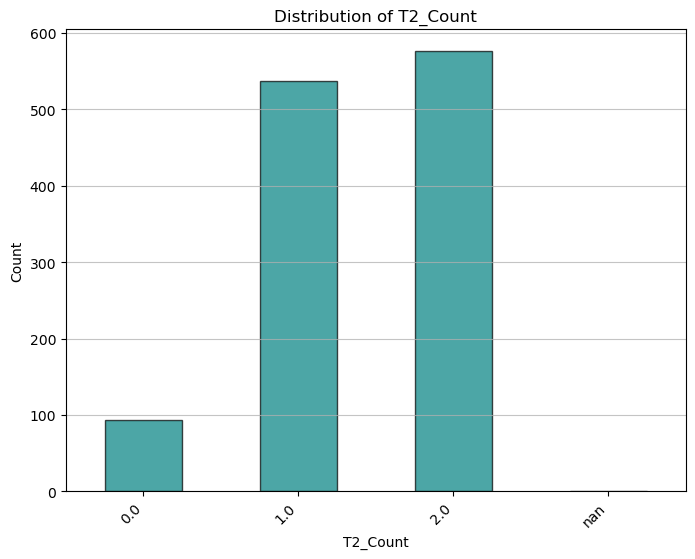

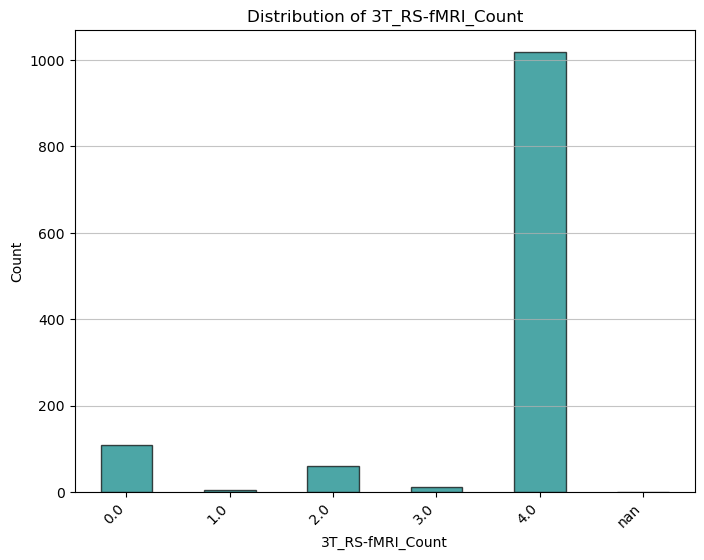

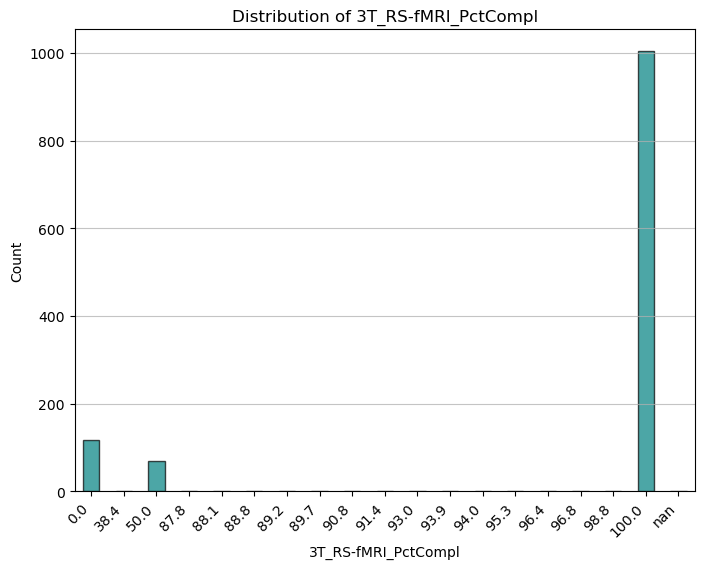

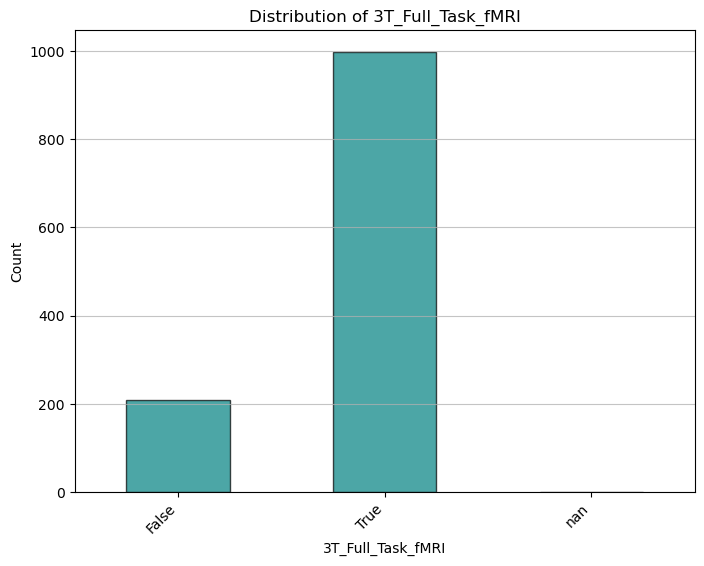

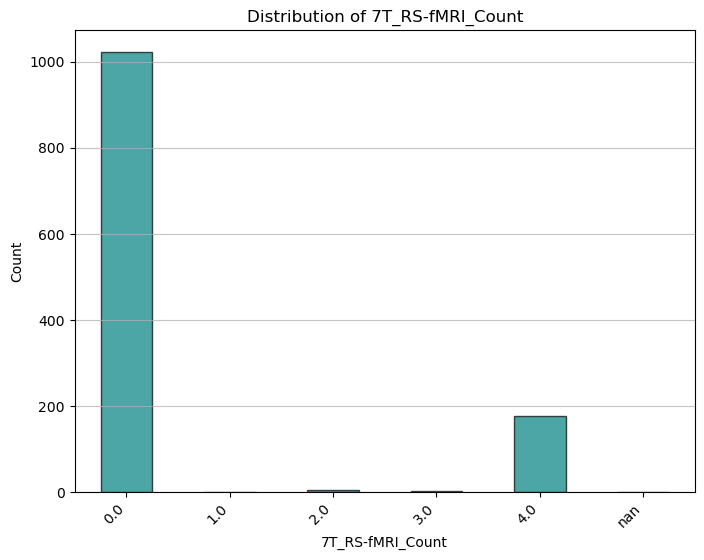

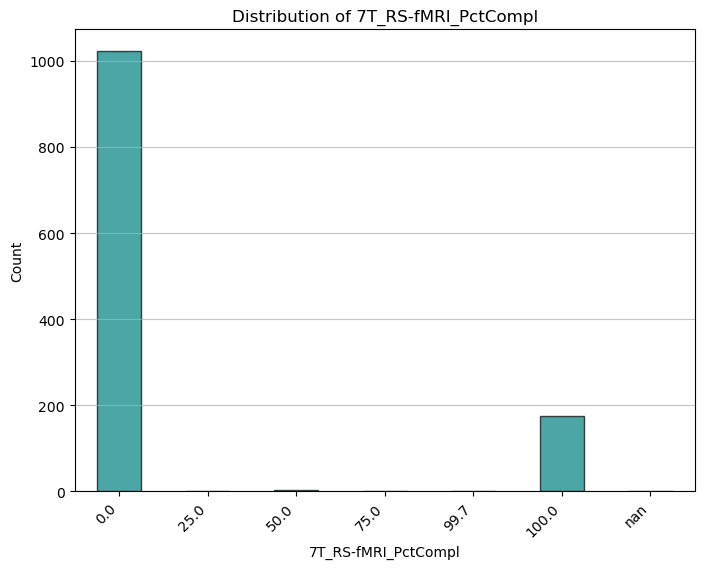

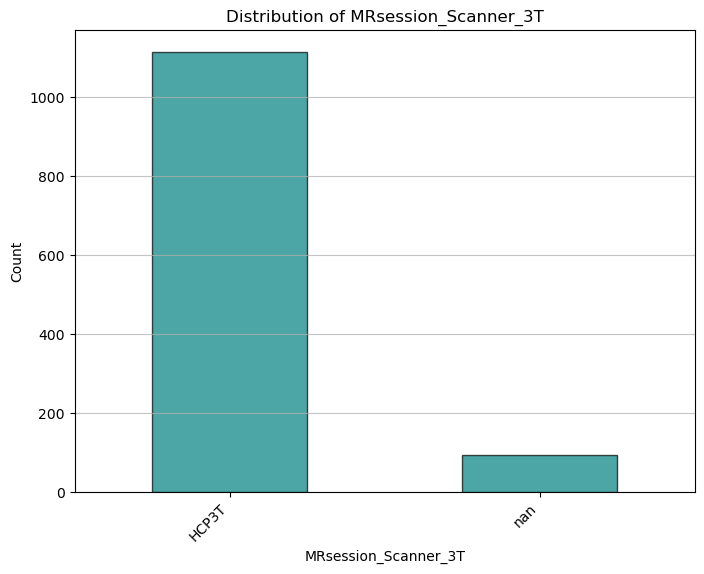

In [17]:
# Analyze imaging-related features
imaging_features = [
  feature for feature in merged_metadata.columns 
  if '3T' in feature or 'T1' in feature or 'T2' in feature or 'fMRI' in feature
]

for feature in imaging_features:
  if feature in merged_metadata.columns:
    plt.figure(figsize=(8, 6))
    merged_metadata[feature].value_counts(dropna=False).sort_index().plot(
      kind='bar', color='teal', edgecolor='black', alpha=0.7
    )
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.75)
    plt.show()
  else:
    print(f"Column '{feature}' not found in the dataset.")


## Cognitive and Clinical Measures


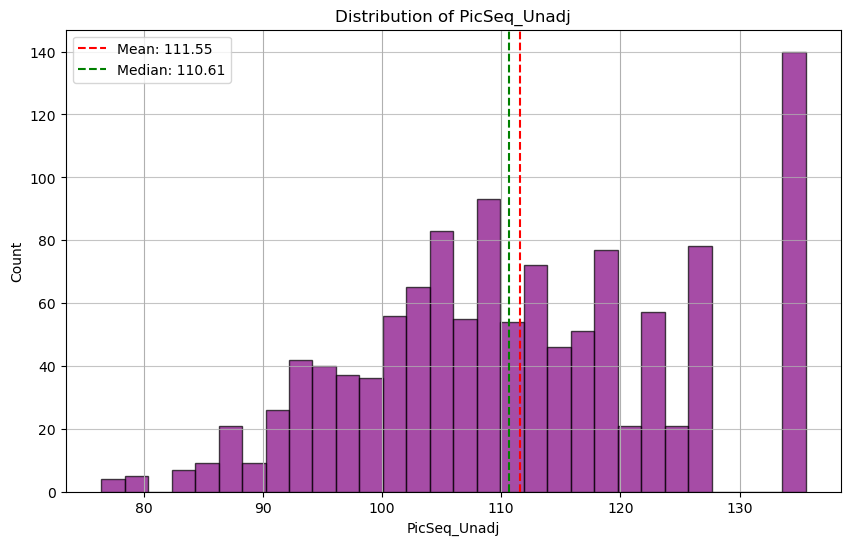

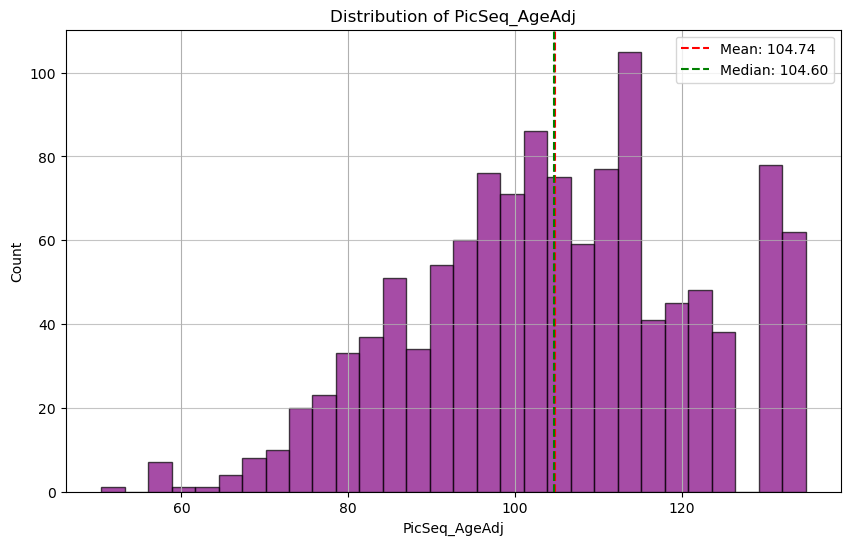

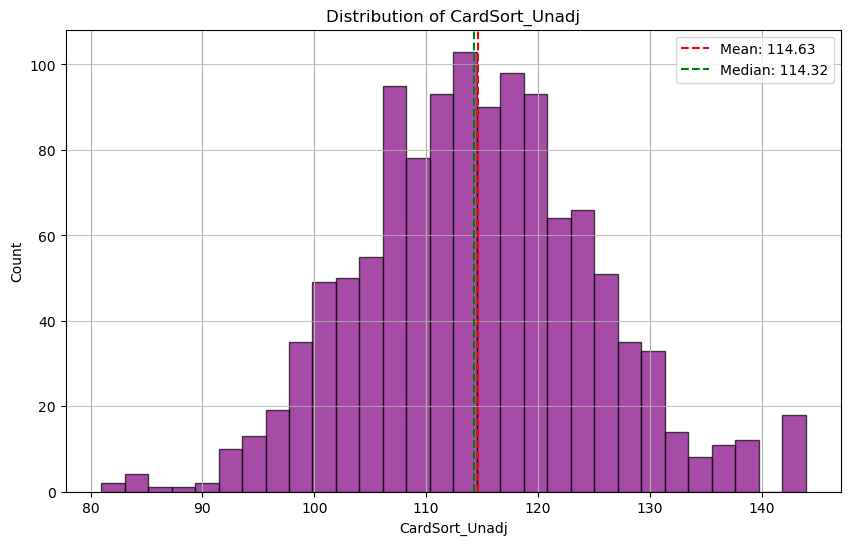

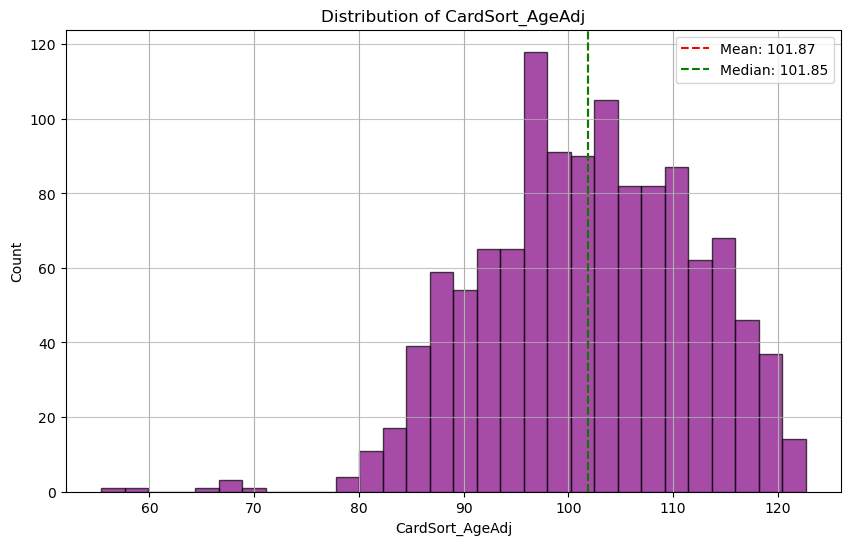

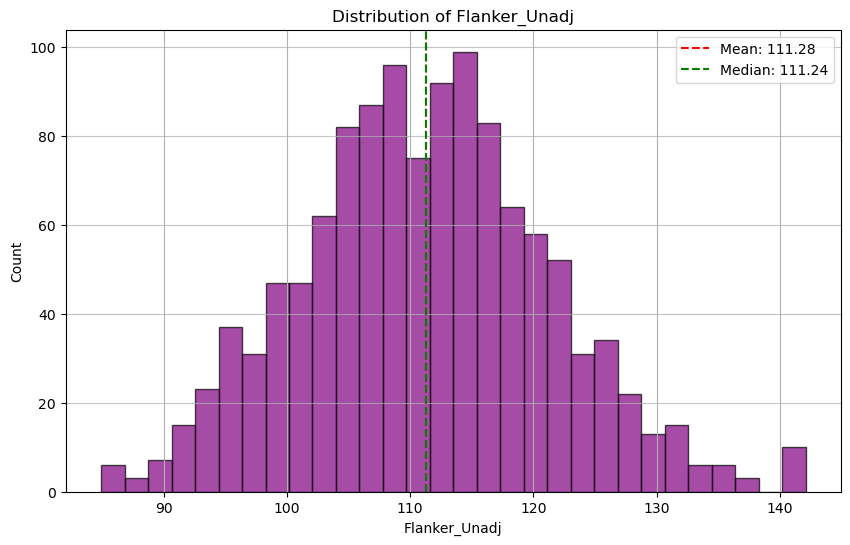

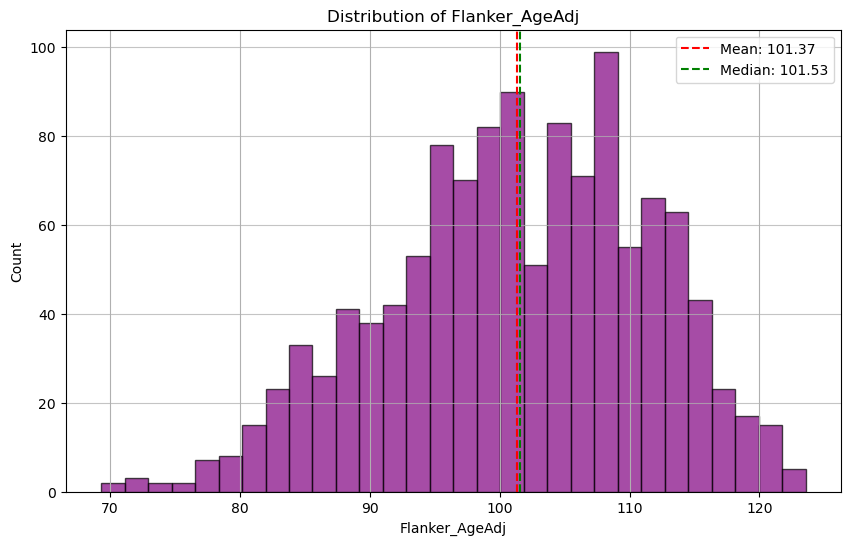

In [18]:
# Identify cognitive and clinical measures
cognitive_clinical_features = [
  feature for feature in merged_metadata.columns 
  if any(keyword in feature.lower() for keyword in ['score', 'tscore', 'raw',
                                                    'unadj', 'ageadj', 'errs'])
]

# Plot distributions for cognitive and clinical measures
for feature in cognitive_clinical_features:
  if merged_metadata[feature].dtype in ['float64', 'int64']:
    plt.figure(figsize=(10, 6))
    merged_metadata[feature].dropna().hist(bins=30, color='purple', alpha=0.7,
                                           edgecolor='black')
    mean_value = merged_metadata[feature].mean()
    median_value = merged_metadata[feature].median()
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1.5,
                label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1.5,
                label=f'Median: {median_value:.2f}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()
  else:
    print(f"Skipping non-numeric feature: {feature}")


## Outliers and Missing Data


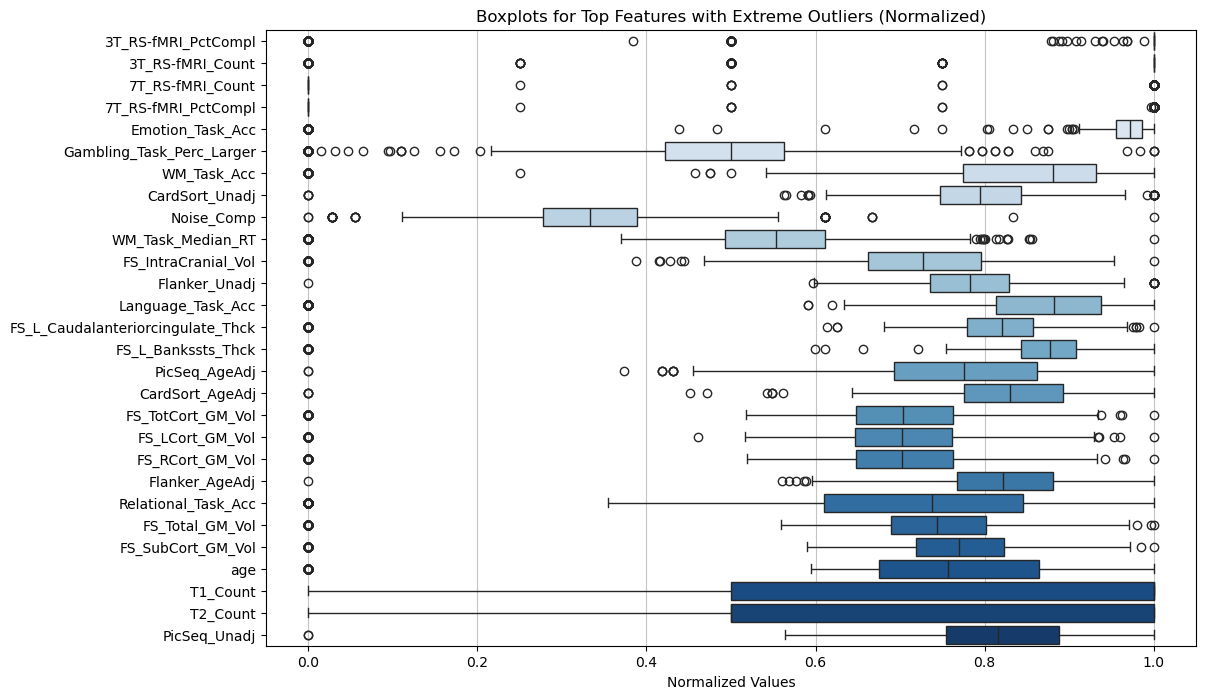

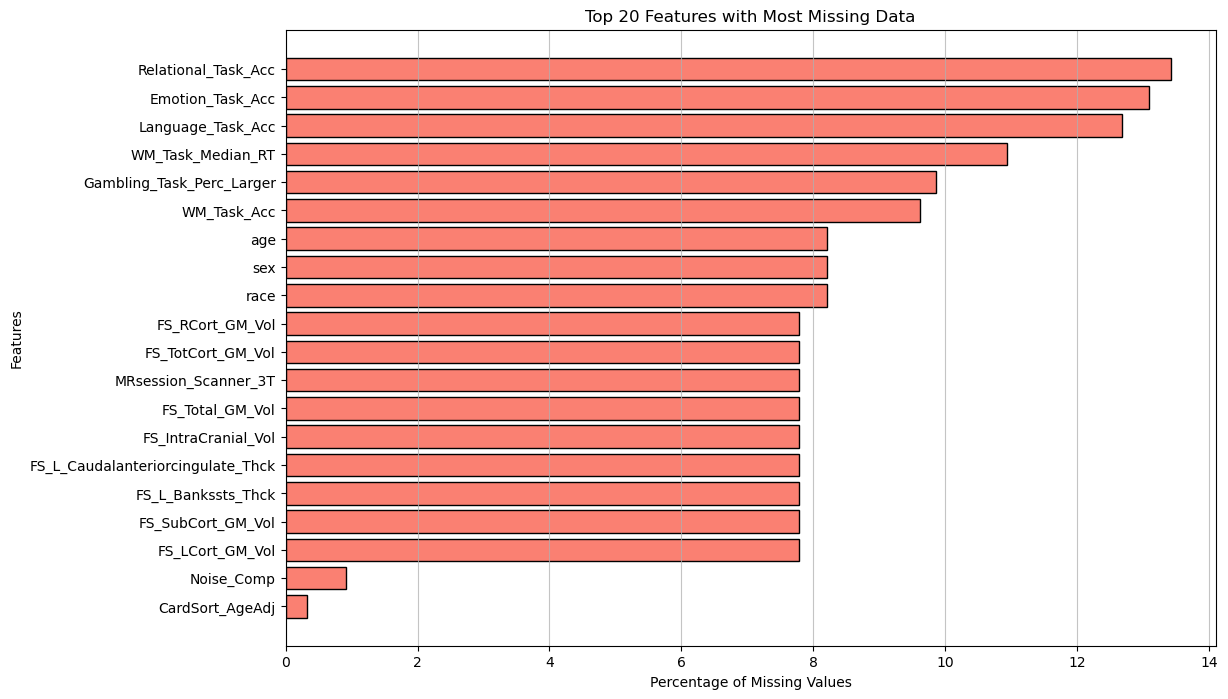

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Outliers Detection for Continuous Variables
continuous_features = merged_metadata.select_dtypes(include=['float64',
                                                             'int64']).columns

# Normalize features to a common range for consistent visualization
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(
  scaler.fit_transform(merged_metadata[continuous_features].fillna(0)),
  columns=continuous_features
)

# Detect extreme outliers using IQR method
outlier_features = []
outlier_counts = {}
for feature in continuous_features:
  if merged_metadata[feature].dropna().shape[0] > 0:
      Q1 = merged_metadata[feature].quantile(0.25)
      Q3 = merged_metadata[feature].quantile(0.75)
      IQR = Q3 - Q1
      outliers = merged_metadata[
        (merged_metadata[feature] < (Q1 - 1.5 * IQR)) |
        (merged_metadata[feature] > (Q3 + 1.5 * IQR))
      ]
      outlier_counts[feature] = len(outliers)
      if len(outliers) > 0:
          outlier_features.append(feature)

# Select top features with the most extreme outliers
top_outlier_features = sorted(outlier_counts, key=outlier_counts.get,
                              reverse=True)

# Summarizing outliers for selected features
if top_outlier_features:
  plt.figure(figsize=(12, 8))
  sns.boxplot(data=normalized_data[top_outlier_features], orient='h',
              palette='Blues')
  plt.title('Boxplots for Top Features with Extreme Outliers (Normalized)')
  plt.xlabel('Normalized Values')
  plt.grid(axis='x', alpha=0.75)
  plt.show()
else:
  print("No extreme outliers detected in the dataset.")

# Missing Data Analysis
missing_data = merged_metadata.isnull().sum().reset_index()
missing_data.columns = ['Feature', 'MissingValues']
missing_data['MissingPercentage'] = (
  missing_data['MissingValues'] / len(merged_metadata)
) * 100
missing_data = missing_data.sort_values(by='MissingValues', ascending=False)

# Select features with most missing data
high_missing_features = (
  missing_data[missing_data['MissingValues'] > 0]
  .head(10)['Feature']
  .tolist()
)
    
if high_missing_features:
  plt.figure(figsize=(12, 8))
  plt.barh(missing_data['Feature'][:20],
           missing_data['MissingPercentage'][:20], color='salmon',
           edgecolor='black')
  plt.xlabel('Percentage of Missing Values')
  plt.ylabel('Features')
  plt.title('Top 20 Features with Most Missing Data')
  plt.grid(axis='x', alpha=0.75)
  plt.gca().invert_yaxis()
  plt.show()
else:
  print("No features with missing data found.")


## Relationship Between Variables


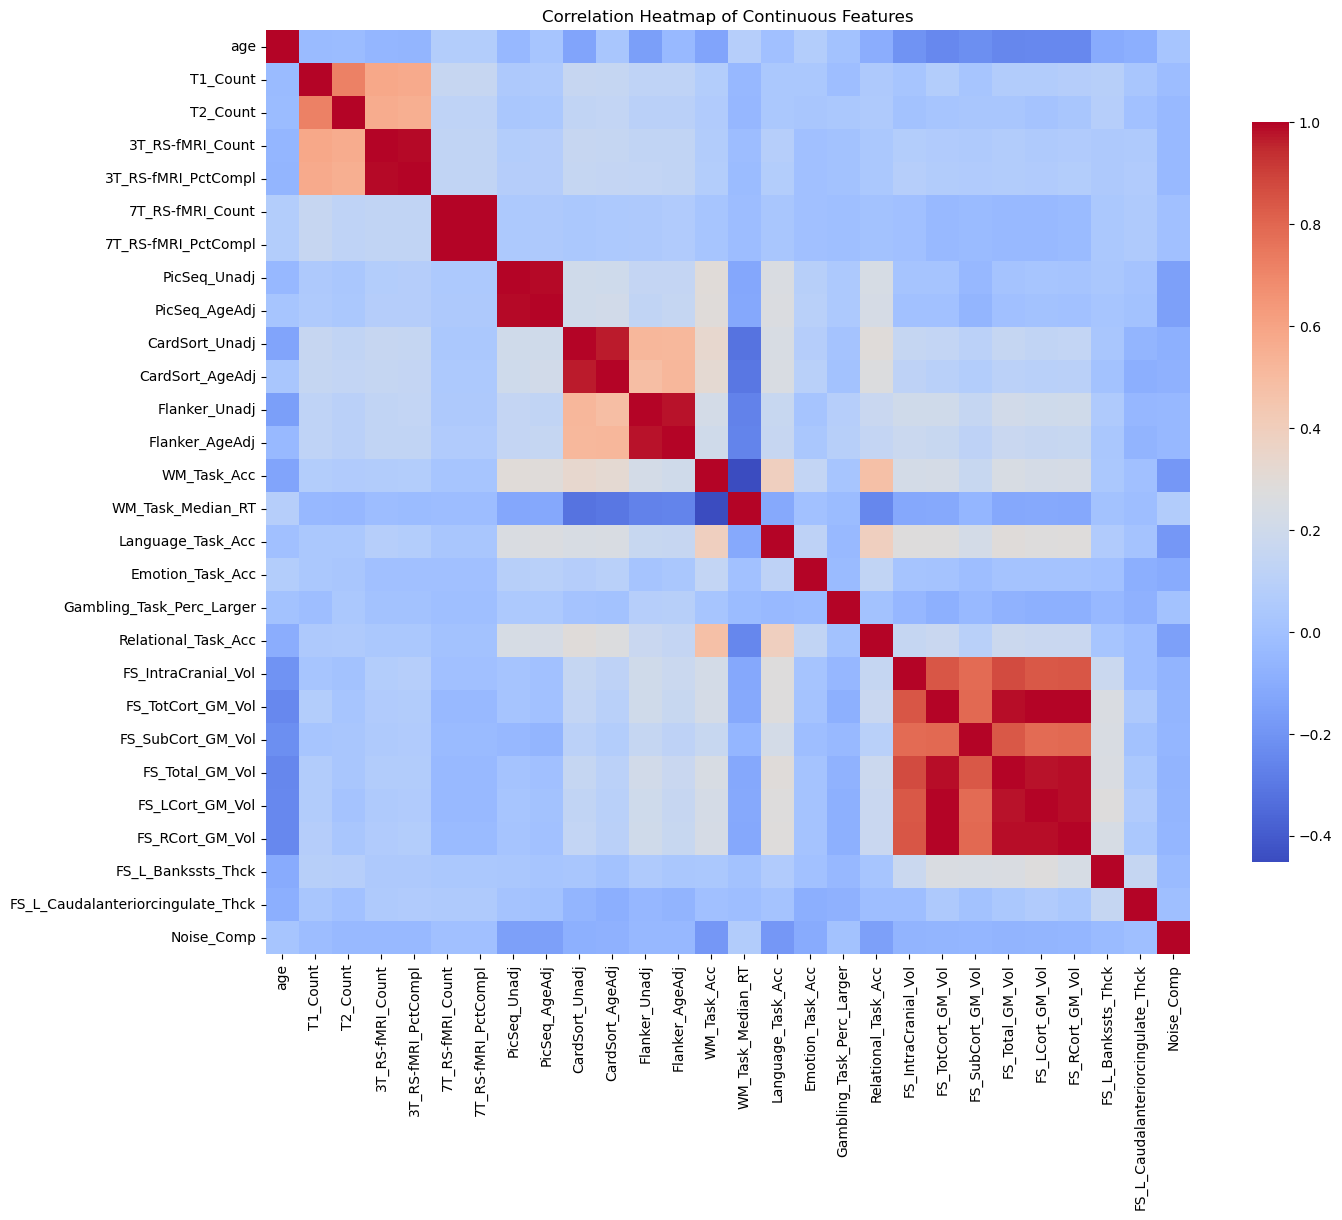

Strongly Correlated Feature Pairs (|correlation| >= 0.7):
7T_RS-fMRI_Count     7T_RS-fMRI_PctCompl    1.000000
7T_RS-fMRI_PctCompl  7T_RS-fMRI_Count       1.000000
FS_TotCort_GM_Vol    FS_RCort_GM_Vol        0.996194
FS_RCort_GM_Vol      FS_TotCort_GM_Vol      0.996194
FS_TotCort_GM_Vol    FS_LCort_GM_Vol        0.996020
FS_LCort_GM_Vol      FS_TotCort_GM_Vol      0.996020
3T_RS-fMRI_Count     3T_RS-fMRI_PctCompl    0.993008
3T_RS-fMRI_PctCompl  3T_RS-fMRI_Count       0.993008
PicSeq_AgeAdj        PicSeq_Unadj           0.992739
PicSeq_Unadj         PicSeq_AgeAdj          0.992739
FS_TotCort_GM_Vol    FS_Total_GM_Vol        0.986425
FS_Total_GM_Vol      FS_TotCort_GM_Vol      0.986425
FS_LCort_GM_Vol      FS_RCort_GM_Vol        0.984459
FS_RCort_GM_Vol      FS_LCort_GM_Vol        0.984459
                     FS_Total_GM_Vol        0.983032
FS_Total_GM_Vol      FS_RCort_GM_Vol        0.983032
FS_LCort_GM_Vol      FS_Total_GM_Vol        0.982129
FS_Total_GM_Vol      FS_LCort_GM_Vol     

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlations between continuous features
continuous_features = merged_metadata.select_dtypes(include=['float64',
                                                             'int64']).columns
correlation_matrix = merged_metadata[continuous_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
  correlation_matrix, 
  annot=False, 
  cmap='coolwarm', 
  fmt='.2f', 
  square=True, 
  cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

# Extract strongly correlated pairs (|correlation| >= 0.7)
correlation_pairs = correlation_matrix.unstack().sort_values(key=abs,
                                                             ascending=False)
strong_pairs = correlation_pairs[
  (correlation_pairs.index.get_level_values(0) !=
   correlation_pairs.index.get_level_values(1)) &
  (abs(correlation_pairs) >= 0.7)
]

print("Strongly Correlated Feature Pairs (|correlation| >= 0.7):")
print(strong_pairs)

# Plot scatter plots for strongly correlated pairs
#for (feature1, feature2), corr_value in strong_pairs.items():
  #plt.figure(figsize=(8, 6))
  #sns.scatterplot(
      #x=merged_metadata[feature1], 
      #y=merged_metadata[feature2], 
      #alpha=0.7
  #)
  #plt.title(f'Scatter Plot: {feature1} vs {feature2} (Corr: {corr_value:.2f})')
  #plt.xlabel(feature1)
  #plt.ylabel(feature2)
  #plt.grid(alpha=0.5)
  #plt.show()


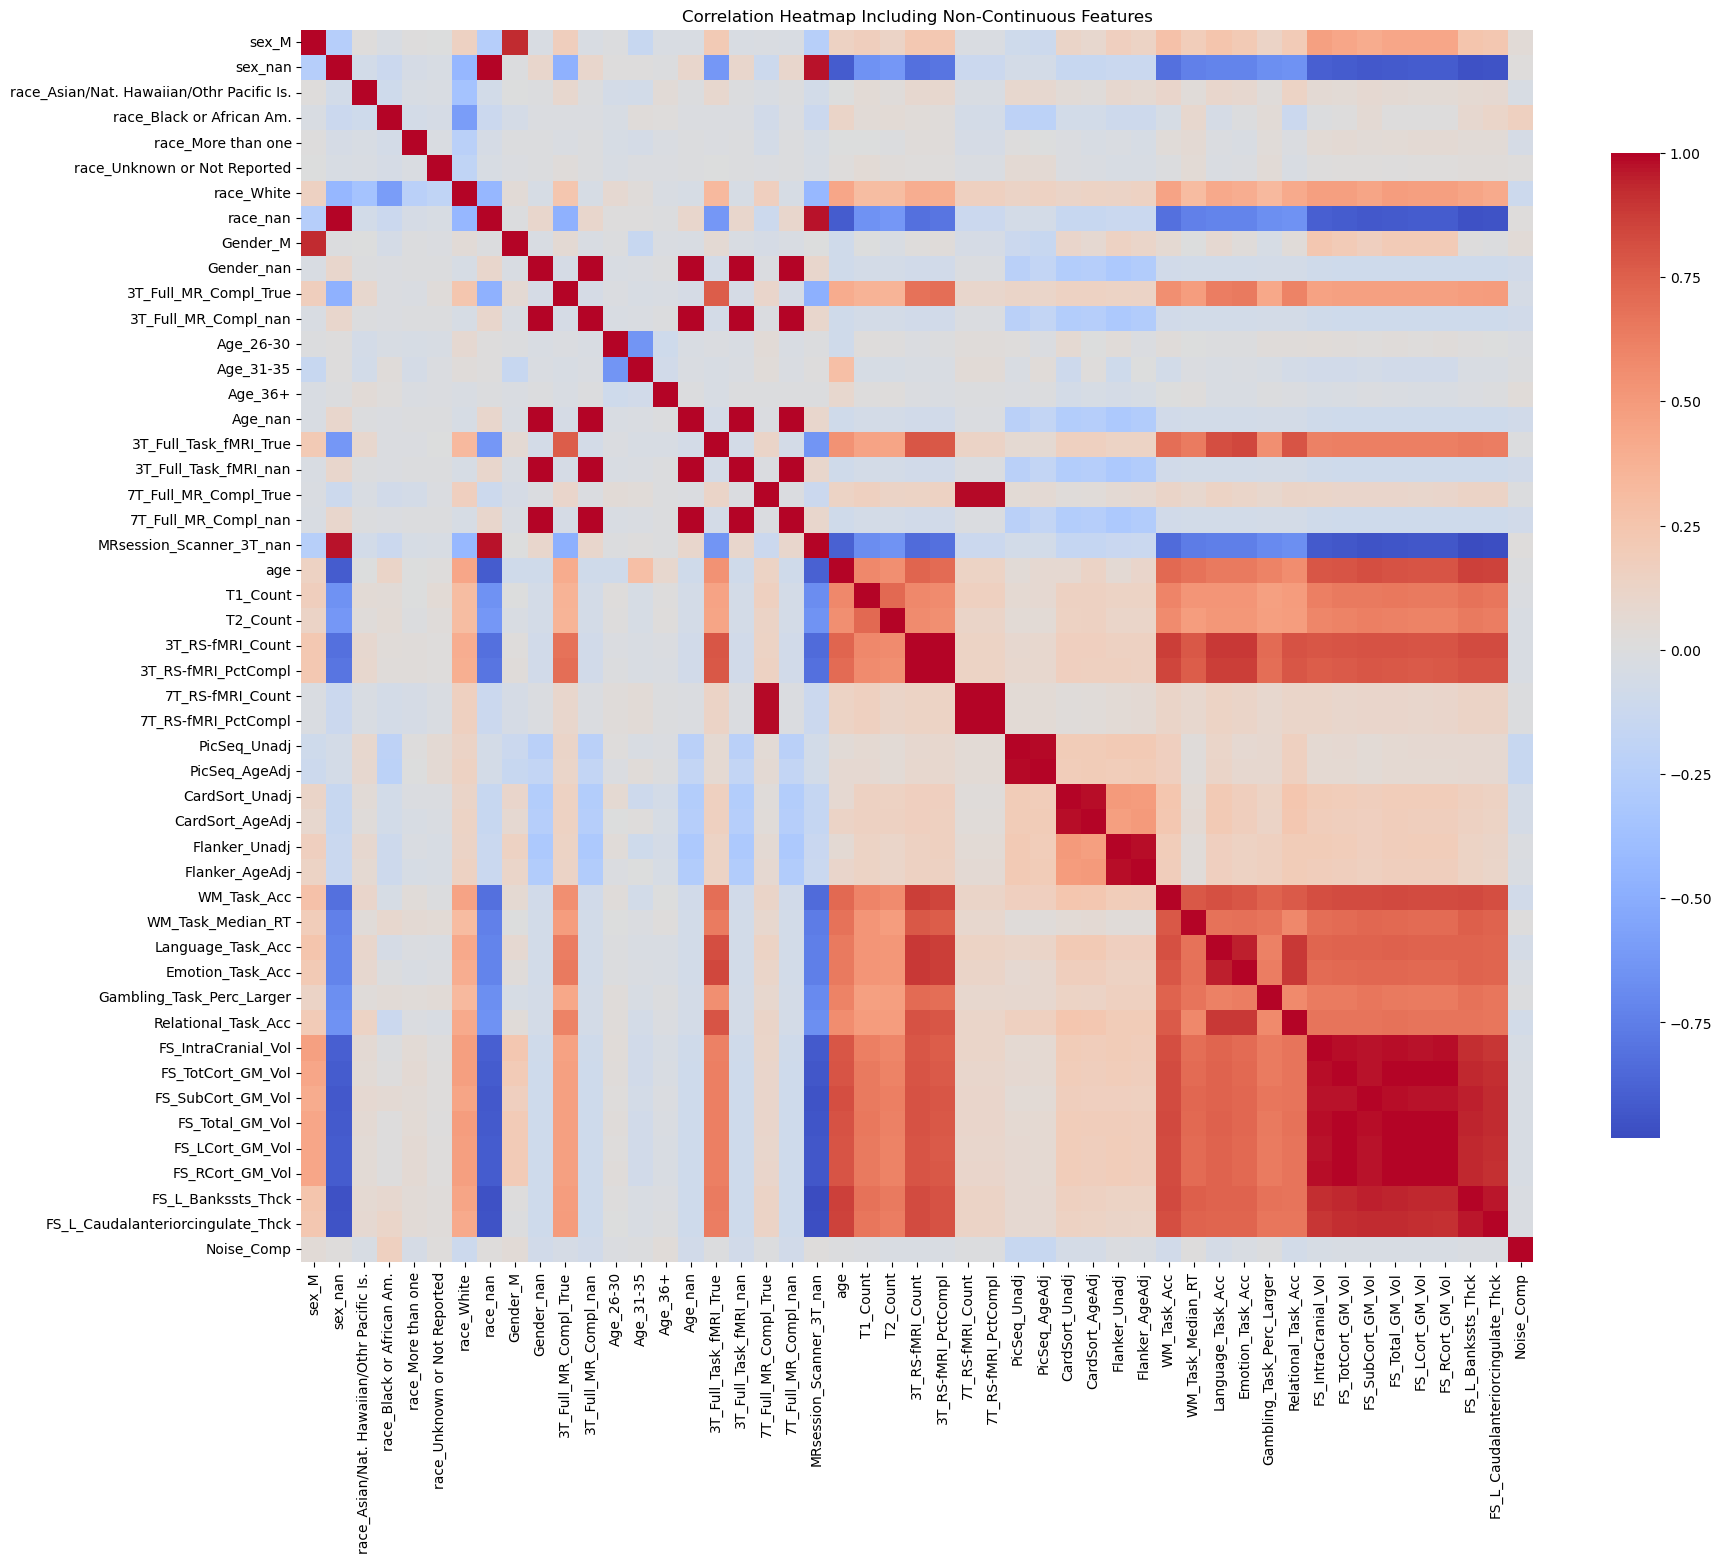

Strongly Correlated Feature Pairs (|correlation| >= 0.7):
7T_Full_MR_Compl_nan               3T_Full_Task_fMRI_nan                1.000000
                                   Age_nan                              1.000000
                                   3T_Full_MR_Compl_nan                 1.000000
                                   Gender_nan                           1.000000
sex_nan                            race_nan                             1.000000
3T_Full_Task_fMRI_nan              7T_Full_MR_Compl_nan                 1.000000
                                   Age_nan                              1.000000
                                   3T_Full_MR_Compl_nan                 1.000000
                                   Gender_nan                           1.000000
Age_nan                            7T_Full_MR_Compl_nan                 1.000000
                                   3T_Full_Task_fMRI_nan                1.000000
                                   3T_Full_MR_Compl

In [21]:
from sklearn.preprocessing import OneHotEncoder

# Ensure all categorical columns have uniform string types
merged_metadata[categorical_features] = (
  merged_metadata[categorical_features].astype(str)
)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(
  merged_metadata[categorical_features].fillna('Missing')
)
encoded_categorical_df = pd.DataFrame(
  encoded_categorical,
  columns=encoder.get_feature_names_out(categorical_features)
)

# Combine encoded categorical features with continuous features
combined_data = pd.concat(
  [
      encoded_categorical_df,
      merged_metadata[continuous_features]
      .fillna(0)
      .reset_index(drop=True)
  ],
  axis=1
)

# Compute the correlation matrix
correlation_matrix_combined = combined_data.corr()

# Visualize the correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(
  correlation_matrix_combined, 
  annot=False, 
  cmap='coolwarm', 
  fmt='.2f', 
  square=True, 
  cbar_kws={'shrink': 0.8}
)
plt.title('Correlation Heatmap Including Non-Continuous Features')
plt.show()

# Extract strongly correlated pairs (|correlation| >= 0.7)
correlation_pairs_combined = (
  correlation_matrix_combined.unstack()
  .sort_values(key=abs, ascending=False)
)
strong_pairs_combined = correlation_pairs_combined[
  (correlation_pairs_combined.index.get_level_values(0) !=
   correlation_pairs_combined.index.get_level_values(1)) &
  (abs(correlation_pairs_combined) >= 0.7)
]

print("Strongly Correlated Feature Pairs (|correlation| >= 0.7):")
print(strong_pairs_combined)


## Multicolinearity Check


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency

# Compute Variance Inflation Factor (VIF) for continuous features
# Drop rows with missing values for VIF calculation
X = merged_metadata[continuous_features].dropna()

# Standardize features before VIF computation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute VIF
vif_data = pd.DataFrame({
  "Feature": X.columns,
  "VIF": [
      variance_inflation_factor(X_scaled, i)
      for i in range(X_scaled.shape[1])
  ]
})

# Display VIF results
print("Variance Inflation Factor (VIF) Results:")
print(vif_data.sort_values(by="VIF", ascending=False))

# Multicollinearity for Categorical Features
print("\nMulticollinearity Analysis for Categorical Features:")
for i, feature1 in enumerate(categorical_features):
  for feature2 in categorical_features[i + 1:]:
      contingency_table = pd.crosstab(merged_metadata[feature1],
                                      merged_metadata[feature2])
      chi2, p, dof, expected = chi2_contingency(contingency_table)
      print(
          f"Chi-Square between {feature1} and {feature2}: "
          f"chi2 = {chi2:.2f}, p = {p:.4f}"
      )
      if p < 0.05:
          print(
              f"--> Significant relationship detected between {feature1} "
              f"and {feature2} (p < 0.05)."
          )


Variance Inflation Factor (VIF) Results:
                              Feature           VIF
20                  FS_TotCort_GM_Vol  1.140335e+10
24                    FS_RCort_GM_Vol  2.941424e+09
23                    FS_LCort_GM_Vol  2.808635e+09
5                    7T_RS-fMRI_Count  1.586102e+07
6                 7T_RS-fMRI_PctCompl  1.586101e+07
8                       PicSeq_AgeAdj  1.297771e+02
7                        PicSeq_Unadj  1.289528e+02
22                    FS_Total_GM_Vol  6.415189e+01
11                      Flanker_Unadj  3.938791e+01
12                     Flanker_AgeAdj  3.922916e+01
10                    CardSort_AgeAdj  3.563432e+01
9                      CardSort_Unadj  3.518257e+01
3                    3T_RS-fMRI_Count  1.216360e+01
4                 3T_RS-fMRI_PctCompl  1.213248e+01
19                FS_IntraCranial_Vol  5.190064e+00
21                  FS_SubCort_GM_Vol  4.275199e+00
0                                 age  2.215038e+00
13                     